In [2]:
import pandas as pd
import requests
import bs4

In [4]:
habr_data = pd.read_csv('../04.10.23/habr.csv')
cyberleninka_data = pd.read_csv('../04.10.23/cyberleninka.csv')

In [8]:
articles = []

for link in habr_data.link:
    try:
        soup = bs4.BeautifulSoup(requests.get(link).text, features="lxml")
        text_content = soup.select('#post-content-body > div > *:not(.pre)')[0].getText()

        articles.append(text_content)
    except:
        print('Problem on', link)

Problem on https://habr.com/ru/companies/cloud4y/news/562980/


In [20]:
for link in cyberleninka_data.link:
    try:
        soup = bs4.BeautifulSoup(requests.get(link).text, features="lxml")
        text_content = soup.select('.abstract p[itemprop=description]')[0].getText()

        articles.append(text_content)
    except:
        print('Problem on', link)

Problem on https://cyberleninka.ru/article/n/grazhdansko-pravovoy-rezhim-nevzaimozamenyaemyh-tokenov-nft-sovremennoe-sostoyanie-i-perspektivy-razvitiya-zakonodatelstva
Problem on https://cyberleninka.ru/article/n/klassifikatsiya-tsifrovyh-finansovyh-aktivov-i-ih-identifikatsiya-v-finansovoy-otchetnosti
Problem on https://cyberleninka.ru/article/n/vliyanie-akvaponnogo-modulya-na-soderzhanie-azotistyh-soedineniy-v-teplovodnyh-ustanovkah-zamknutogo-vodosnabzheniya-pri
Problem on https://cyberleninka.ru/article/n/blockchain-metaverses-and-nft-in-civil-procedure-and-arbitration-in-russia-china-and-usa
Problem on https://cyberleninka.ru/article/n/riski-i-perspektivy-tokenizatsii-tvorchestva-1
Problem on https://cyberleninka.ru/article/n/tokenizatsiya-tvorchestva-motivatsiya-polzovateley-konsensualnaya-tsennost-i-avtorskoe-pravo-kitaya
Problem on https://cyberleninka.ru/article/n/risks-and-prospects-of-creativity-tokenization
Problem on https://cyberleninka.ru/article/n/perspektivy-razvitiya-

In [30]:
text_content = ' '.join(articles)
print('articles:', len(articles), 'chars:', len(text_content))

articles: 258 chars: 1336152


In [31]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

doc = Doc(text_content)

In [34]:
doc.segment(segmenter)

doc.tag_morph(morph_tagger)

for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [50]:
final_text = []

skip_pos = ['PUNCT', 'ADP', 'CCONJ', 'PART', 'NUM', 'AUX', 'DET', 'INTJ', 'PRON', 'SCONJ', 'SYM', 'VERB', 'ADV']

skip_word = ['nft', 'новый', 'год', 'человек', 'компания', 'другой']

for token in doc.tokens:
    if token.pos in skip_pos or token.lemma in skip_word:
        continue

    final_text.append(token.lemma)

(-0.5, 1279.5, 799.5, -0.5)

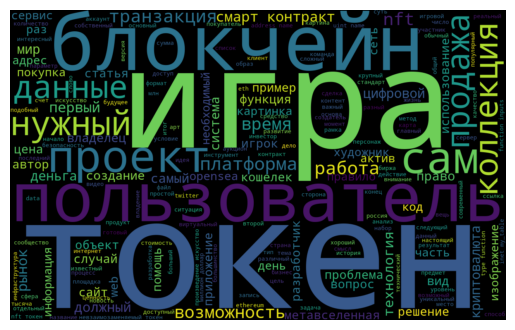

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1280, height=800).generate(' '.join(final_text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")